# Pymaceuticals Inc.
---

### Analysis

- In general, Capomulin treatment was quite helpful for tumor volume reduction. Based on the observation of a mouse (randomly selected) that was treated by Capomulin, Tumor Volume reduced the most between 25 to 35 days, but seemed to be increasing again after 35 days.
- As a whole, the heavier the mouse was, the more tumor volume it would contain.
- As a whole, the gender of mice did not affect the result in any tremendous way because the selection of samples was quite balanced and successful. 49% of the mice were female while 51% was male, which was almost 50% vs. 50%.
- In general, mice that were treated with Capomulin or Ramicane had lower amount of tumor volume comparing to the ones that were treated with other drug regimen. However, there were more mice got tested with Capomulin or Ramicane, which could be the reason for the lower amount in tumor volume.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# preview
mouse_study_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# number of unique mice IDs
unique_mouseID = pd.Series(mouse_study_data["Mouse ID"].unique())
mice_count = unique_mouseID.count()
mice_count

249

In [3]:
# check for any mouse ID with duplicate time points

duplicated_mouseID = mouse_study_data[mouse_study_data.duplicated(subset=['Mouse ID','Timepoint'],keep = False)]
pd.unique(duplicated_mouseID["Mouse ID"])

array(['g989'], dtype=object)

In [4]:
# Display the data associated with that mouse ID,
duplicated_mouseID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# create a new DataFrame where duplicated data is removed
mouse_study_df = mouse_study_data.set_index("Mouse ID")
mouse_study_df = mouse_study_df.drop(index = "g989")
mouse_study_df = mouse_study_df.reset_index()
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Display the updated number of unique mice IDs
unique_mouseID = pd.Series(mouse_study_df["Mouse ID"].unique())
mice_count = unique_mouseID.count()
mice_count

248

## Summary Statistics

In [7]:
# Create a DataFrame of summary statistics. 

# Your summary statistics should include:
# A row for each drug regimen. These regimen names should be contained in the index column.
# # A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

In [8]:
mouse_study_df.columns


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [9]:
# columns
Mean_Tumor_Volume = mouse_study_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()
Median_Tumor_Volume = mouse_study_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median()
Tumor_Volume_Variance = mouse_study_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var()
Tumor_Volume_Standard_Deviation = mouse_study_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std() 
Tumor_Volume_SEM = mouse_study_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem() 


summary_df = Mean_Tumor_Volume.to_frame()

summary_df = summary_df.rename(columns = {"Tumor Volume (mm3)": "Mean Tumor Volume"}) 
summary_df["Median Tumor Volume"] = Median_Tumor_Volume
summary_df["Tumor Volume Variance"] = Tumor_Volume_Variance
summary_df["Tumor Volume Standard Deviation"] = Tumor_Volume_Standard_Deviation
summary_df["Tumor Volume Std. Err."] = Tumor_Volume_SEM

In [10]:
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
# Generate two bar charts. 
# Both charts should be identical and show the total number of time points for all mice tested for each drug regimen throughout the study.

In [12]:
# Create the first bar chart with the Pandas DataFrame.plot() method.

# Get the number of mice for each drug
mice_count_for_each_drug = mouse_study_df.groupby(["Drug Regimen"])["Mouse ID"].count()

In [13]:
# Get a list of Drug Regimen
index = mice_count_for_each_drug.index

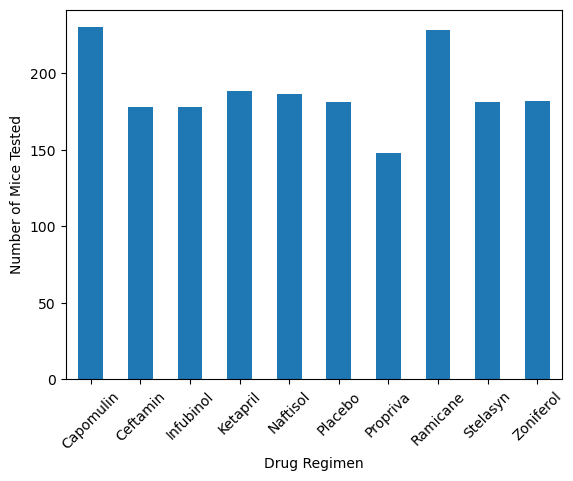

In [14]:
# Create bar chart
df = pd.DataFrame({'Drug Regimen':index, 'Number of Mice Tested':mice_count_for_each_drug})
ax = df.plot.bar(x='Drug Regimen', y='Number of Mice Tested', rot=45, legend = False).set_ylabel("Number of Mice Tested")

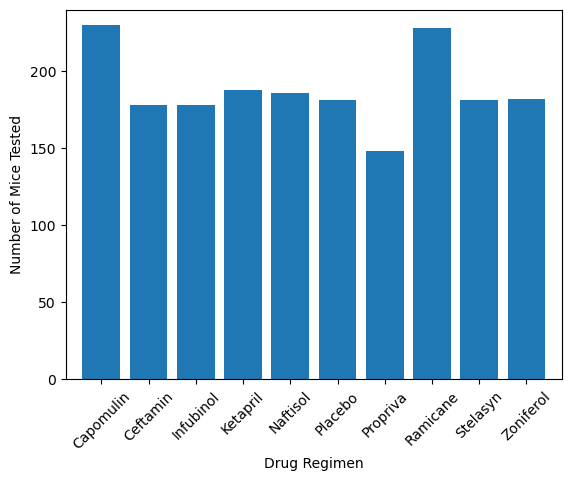

In [15]:
# Create the second bar chart with Matplotlib's pyplot methods

x_axis = np.arange(len(mice_count_for_each_drug))

# Create a bar chart based upon the above data
plt.bar(x_axis, mice_count_for_each_drug, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, index, rotation =45)


# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)


# Set the limits of the y axis
plt.ylim(0, max(mice_count_for_each_drug)+10)


# Give the chart x label and y label
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


plt.show()

In [16]:
# Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.

In [17]:
# get number of female and male mice in the study
mouse_gender = mouse_study_df.groupby(["Sex"])["Mouse ID"].count()
index = mouse_gender.index

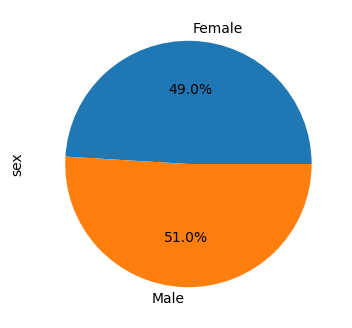

In [18]:
# Create the first pie chart with the Pandas DataFrame.plot() method.
df = pd.DataFrame({'sex': mouse_gender / mice_count}, index = index)

plot = df.plot.pie(y='sex', figsize=(4, 4), autopct='%1.1f%%', legend = False)

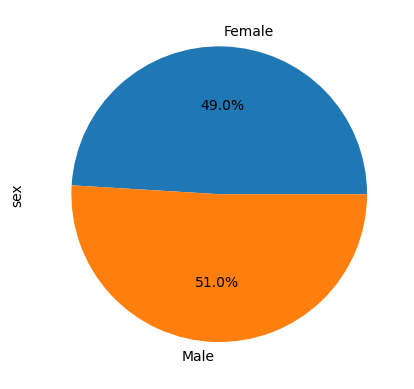

In [19]:
# Create the second pie chart with Matplotlib's pyplot methods.
plt.pie(mouse_gender, labels = index, autopct='%1.1f%%')

plt.ylabel("sex")

plt.show()

## Quartiles, Outliers and Boxplots

1. Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Then, calculate the quartiles and IQR, and determine if there are any potential outliers across all four treatment regimens. Use the following substeps:

In [20]:
# getting the last time point for each mouse

In [21]:
last_time_point = mouse_study_df.groupby("Mouse ID")['Timepoint'].max()
last_time_point = last_time_point.to_frame()
last_time_point

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [22]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(last_time_point,mouse_study_df,on=['Mouse ID','Timepoint']).set_index(['Mouse ID','Timepoint'])
merge_df

,,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,Timepoint,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...
z435,10,48.710661,0,Propriva,Female,12,26
z578,45,30.638696,0,Ramicane,Male,11,16
z581,45,62.754451,3,Infubinol,Female,24,25


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
treatment_list

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [24]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [[],[],[],[]]

In [25]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q75, q25 = np.percentile(merge_df['Tumor Volume (mm3)'], [75 ,25])
IQR = q75 - q25
IQR

19.177757257500012

In [26]:
# Use For loop
for x in range(len(treatment_list)):
    for y in range(len(merge_df['Drug Regimen'])):
        if merge_df.iloc[y,2] == treatment_list[x]:
            tumor_vol_data[x].append(merge_df.iloc[y,0])

In [27]:
# Determine outliers by using the upper and lower bounds, and then print the results
q75, q25 = np.percentile(tumor_vol_data[0], [75 ,25])
IQR_Capomulin = q75 - q25
IQR_Capomulin  


7.781863460000004

In [28]:
q75, q25 = np.percentile(tumor_vol_data[1], [75 ,25])
IQR_Ramicane = q75 - q25
IQR_Ramicane  


9.098536719999998

In [29]:
q75, q25 = np.percentile(tumor_vol_data[2], [75 ,25])
IQR_Infubinol = q75 - q25
IQR_Infubinol


11.477135160000003

In [30]:
q75, q25 = np.percentile(tumor_vol_data[3], [75 ,25])
IQR_Ceftamin = q75 - q25
IQR_Ceftamin


15.577752179999997

2. Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group. Highlight any potential outliers in the plot by changing their color and style.

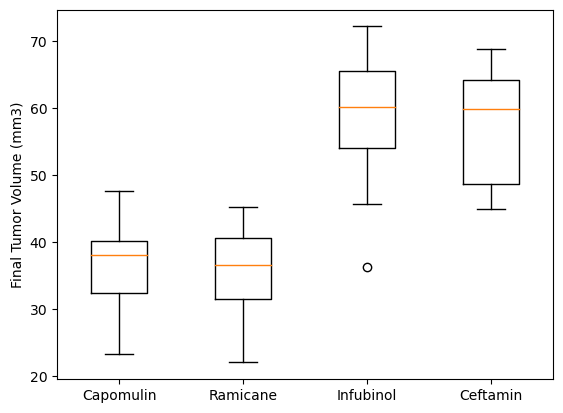

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()

ax1.boxplot(tumor_vol_data)

# formatting
xtickNames = plt.setp(ax1, xticklabels=treatment_list)
plt.setp(xtickNames, rotation=0)

ax1.set_ylabel('Final Tumor Volume (mm3)')

# Display the plot
plt.show()



## Line and Scatter Plots

In [74]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# create a dataframe for mouse b128 that was treated with Capomulin
b128_df = mouse_study_df[(mouse_study_df["Mouse ID"] == "b128")]
b128_df = b128_df.set_index("Mouse ID")

In [33]:
# Set x and y value
x = b128_df['Timepoint']
y = b128_df['Tumor Volume (mm3)']

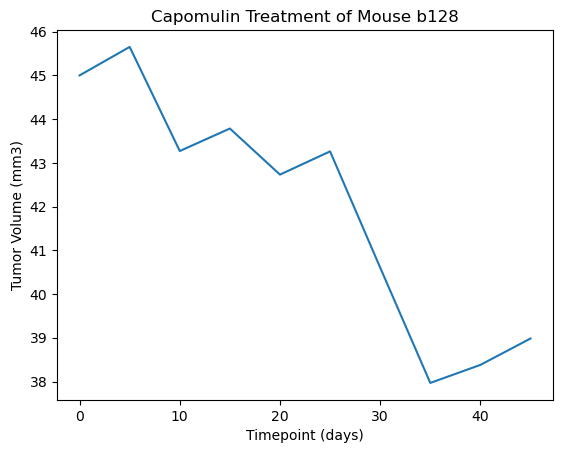

In [34]:
# Plot the line
plt.plot(x, y)

#formatting
plt.title('Capomulin Treatment of Mouse b128')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# show plot
plt.show()

In [56]:
# Generate a scatter plot of tumor volume vs. mouse weight for the Capomulin regimen

# gather data for Capomulin
Capomulin_df = mouse_study_df[(mouse_study_df["Drug Regimen"] == "Capomulin")]
Capomulin_df = Capomulin_df.groupby("Mouse ID").mean()

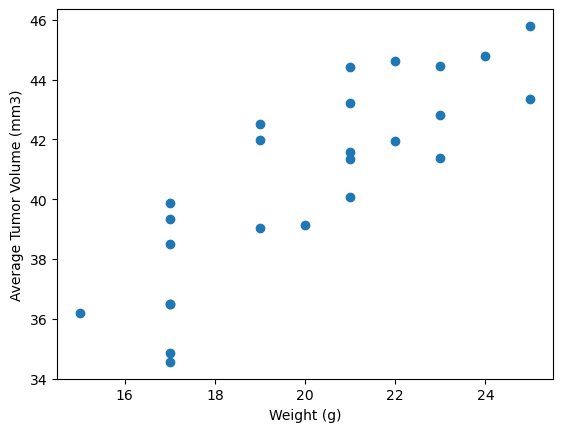

In [57]:
# assign value
average_tumor_vol = Capomulin_df['Tumor Volume (mm3)']
mouse_weight = Capomulin_df['Weight (g)']
# plot
plt.scatter(mouse_weight, average_tumor_vol, marker="o")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [69]:
# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment.
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is \
{round(st.pearsonr(mouse_weight,average_tumor_vol)[0],2)}.")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is 0.84.


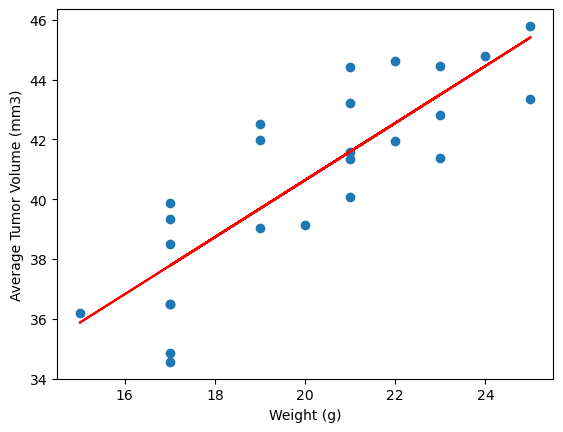

In [73]:
# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_tumor_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,average_tumor_vol)
plt.plot(mouse_weight,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()


In [ ]:
# Plot the linear regression model on top of the previous scatter plot.